In [126]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Yahoo Financial Data.
from pandas_datareader import data as web
from datetime import datetime
import pytz

In [127]:
# Import portafolio.
expert2 = pd.read_csv("dataset/expert_4376_data.csv")
expert3 = pd.read_csv("dataset/expert_5874_data.csv")

In [128]:
get_balance = lambda data: data[data.direction == "out"]["balance"].to_frame()
exp1 = get_balance(expert1)
exp2 = get_balance(expert2)
exp3 = get_balance(expert3)

In [129]:
robots = pd.concat([exp1, exp2, exp3], axis = 1)
robots.columns = ["Daily Balance 1", "Daily Balance 2", "Daily Balance 3"]
robots.fillna(robots.mean(), inplace=True)

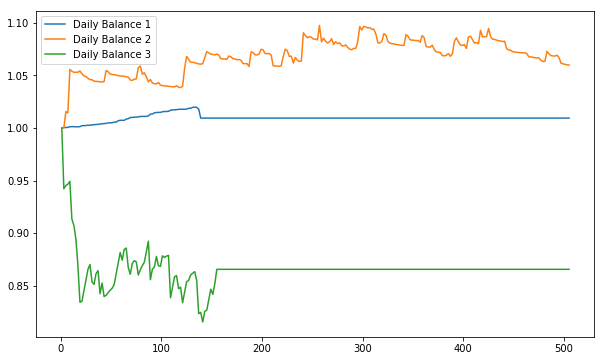

In [130]:
robots_normed = robots / robots.iloc[0]
robots_normed.plot(figsize=(10,6))

In [133]:
# Getting S&P500 Data.
start = datetime(2018, 1, 1, 0, 0, 0)
end = datetime(2018, 12, 31, 0, 0, 0)
data = web.get_data_yahoo('SPY',start=start,end=end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,268.809998,267.399994,267.839996,268.769989,86655700.0,263.759949
2018-01-03,270.640015,268.959991,268.959991,270.470001,90070400.0,265.428253
2018-01-04,272.160004,270.540009,271.200012,271.609985,80636400.0,266.546997
2018-01-05,273.559998,271.950012,272.510010,273.420013,83524000.0,268.323273
2018-01-08,274.100006,272.980011,273.309998,273.920013,57319200.0,268.813934


In [134]:
data["Close"].to_frame().tail()
data["Normed Returns S&P500"] = data["Close"] / data["Close"].iloc[0]

In [135]:
# This should return 251 days in a year.
data["Normed Returns S&P500"].count()

251

In [136]:
# Getting market alpha.
# This must be done with DAILY RETURNS.

robots_normed.reset_index(drop = True, inplace = True)
sp500 = data["Normed Returns S&P500"].to_frame()
sp500.reset_index(drop = True, inplace = True)
robots_normed["S&P500 Returns"] = sp500["Normed Returns S&P500"]

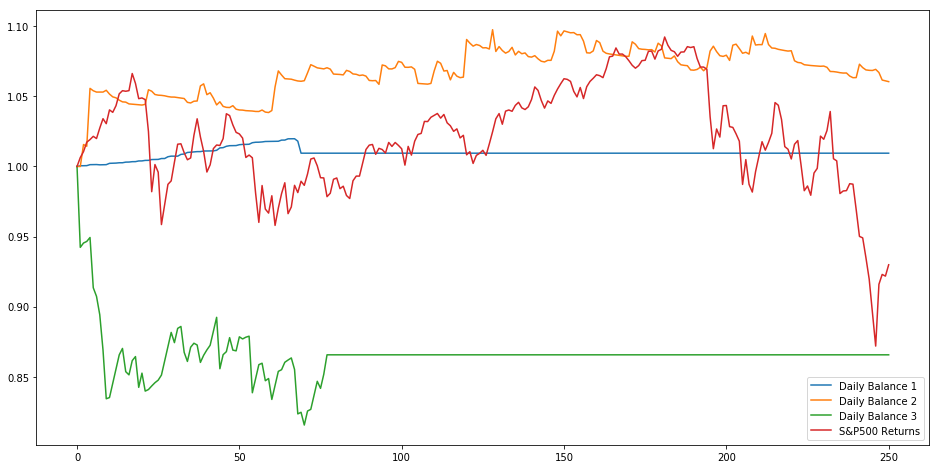

In [137]:
robots_normed.loc[0: 250].plot(figsize=(16,8))

In [138]:
# Alpha per strategy (one year).
def getAlpha(data, column):
    alpha = data[column].iloc[-1] - sp500.iloc[-1]
    return alpha

alpha1 = getAlpha(robots_normed, "Daily Balance 1") * 100
alpha2 = getAlpha(robots_normed, "Daily Balance 2") * 100
alpha3 = getAlpha(robots_normed, "Daily Balance 3") * 100

In [139]:
# Print alpha in percentage.
print(alpha1, alpha2, alpha3)

Normed Returns S&P500    7.958427
Name: 250, dtype: float64 Normed Returns S&P500    13.002403
Name: 250, dtype: float64 Normed Returns S&P500   -6.420843
Name: 250, dtype: float64


In [140]:
# Closing becnchmark (S&P500).
(sp500.iloc[-1] - 1) * 100

Normed Returns S&P500   -7.013428
Name: 250, dtype: float64